Load the dataset into a data frame using Python.

Clean the data as needed.

Plot a line chart to show the average temperature fluctuations in Tunisia and Cameroon. Interpret the results.

Zoom in to only include data between 1980 and 2005, try to customize the axes labels.

Create Histograms to show temperature distribution in Senegal between [1980,2000] and [2000,2023] (in the same figure). Describe the obtained results.

Select the best chart to show the Average temperature per country.

Make your own questions about the dataset and try to answer them using the appropriate visuals.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv("/content/Africa_climate_change.csv")
df.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,19800101 000000,NaN,54.0,61.0,43.0,Tunisia
1,19800101 000000,NaN,49.0,55.0,41.0,Tunisia
2,19800101 000000,0.0,72.0,86.0,59.0,Cameroon
3,19800101 000000,NaN,50.0,55.0,43.0,Tunisia
4,19800101 000000,NaN,75.0,91.0,NaN,Cameroon


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464815 entries, 0 to 464814
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DATE     464815 non-null  object 
 1   PRCP     177575 non-null  float64
 2   TAVG     458439 non-null  float64
 3   TMAX     363901 non-null  float64
 4   TMIN     332757 non-null  float64
 5   COUNTRY  464815 non-null  object 
dtypes: float64(4), object(2)
memory usage: 21.3+ MB


In [4]:
df["DATE"]=pd.to_datetime(df["DATE"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464815 entries, 0 to 464814
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   DATE     464815 non-null  datetime64[ns]
 1   PRCP     177575 non-null  float64       
 2   TAVG     458439 non-null  float64       
 3   TMAX     363901 non-null  float64       
 4   TMIN     332757 non-null  float64       
 5   COUNTRY  464815 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 21.3+ MB


In [6]:
df.isna().sum()[df.isna().sum()>0]

,0
PRCP,287240
TAVG,6376
TMAX,100914
TMIN,132058


In [7]:
df["PRCP"].mean()

0.12094061664085595

In [8]:
df["PRCP"].median()

0.0

In [9]:
df["PRCP"].mode()

,PRCP
0,0.0


In [10]:
df.drop(["PRCP"],axis=1,inplace=True)

In [11]:
df.isna().sum()[df.isna().sum()>0]

,0
TAVG,6376
TMAX,100914
TMIN,132058


In [12]:
df["TAVG"].mean()

77.02983821184498

In [13]:
df["TAVG"].fillna(df["TAVG"].mean(),inplace=True)

<ipython-input-13-6a6ef8c68a9a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TAVG"].fillna(df["TAVG"].mean(),inplace=True)


In [14]:
df["TAVG"].isna().sum()

0

In [15]:
df["TAVG"].isna().sum()

0

In [16]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
df["TMAX"]=imputer.fit_transform(df[["TMAX"]])

In [17]:
df["TMAX"].isna().sum()

0

In [18]:
imputer=SimpleImputer(missing_values=np.nan,strategy="median")
df["TMIN"]=imputer.fit_transform(df[["TMIN"]])

In [19]:
df[["TMIN"]].isna().sum()

,0
TMIN,0


In [20]:
df.isna().sum()[df.isna().sum()>0].to_list()


[]

In [21]:
df.head()

,DATE,TAVG,TMAX,TMIN,COUNTRY
0,1980-01-01,54.0,61.0,43.0,Tunisia
1,1980-01-01,49.0,55.0,41.0,Tunisia
2,1980-01-01,72.0,86.0,59.0,Cameroon
3,1980-01-01,50.0,55.0,43.0,Tunisia
4,1980-01-01,75.0,91.0,68.0,Cameroon


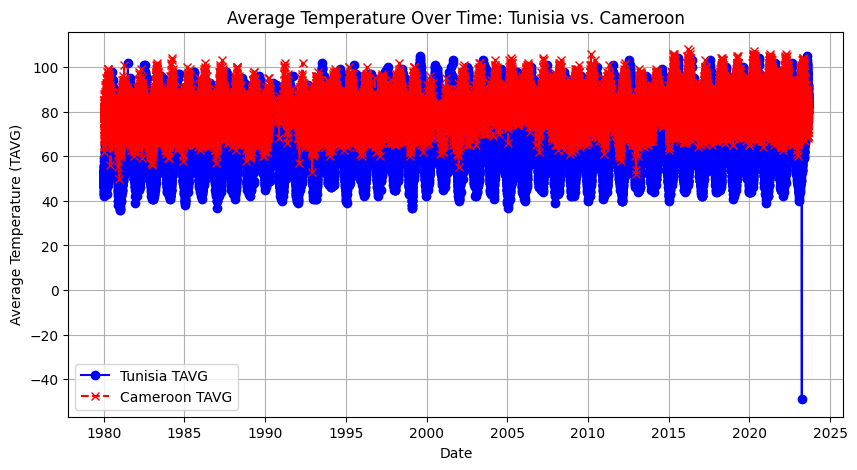

In [22]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d %H%M%S')

# Filter the DataFrame for Tunisia and Cameroon
df_tunisia = df[df['COUNTRY'] == 'Tunisia']
df_cameroon = df[df['COUNTRY'] == 'Cameroon']

# Plotting the line charts for TAVG in Tunisia and Cameroon
plt.figure(figsize=(10, 5))
plt.plot(df_tunisia['DATE'], df_tunisia['TAVG'], marker='o', linestyle='-', color='b', label='Tunisia TAVG')
plt.plot(df_cameroon['DATE'], df_cameroon['TAVG'], marker='x', linestyle='--', color='r', label='Cameroon TAVG')

# Adding titles and labels
plt.title('Average Temperature Over Time: Tunisia vs. Cameroon')
plt.xlabel('Date')
plt.ylabel('Average Temperature (TAVG)')
plt.legend()

# Adding a grid
plt.grid(True)

# Displaying the plot
plt.show()

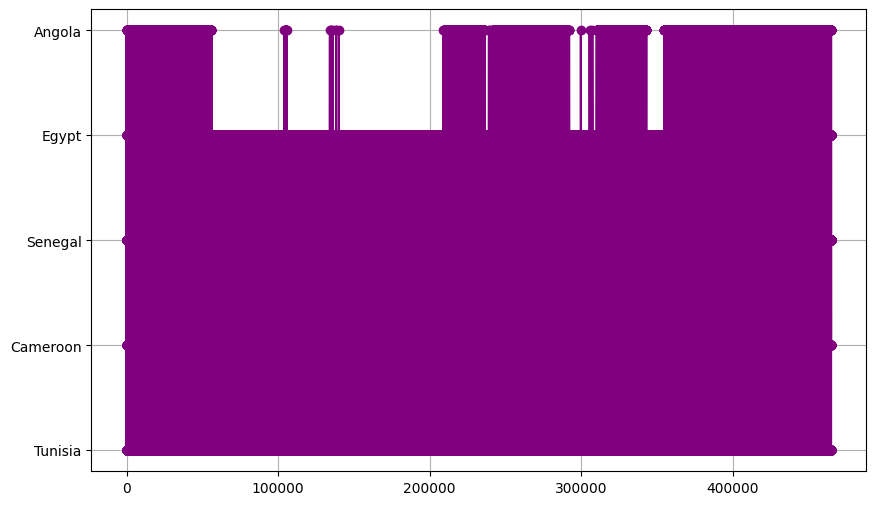

In [23]:
plt.figure(figsize=(10, 6))  # Optional: set the figure size
plt.plot(df["COUNTRY"], marker='o', linestyle='-', color='purple')
plt.grid(True)